## INFSCI - 2725 (Data Analytics)
### Assignment 1
Create a clear problem statement that this data is going to address.  (You don't need to solve the problem, but the data needs to appear to have enough information to address the problem.)
1. Take your dataset (at least 10 different variables and 500 observations).  Select 10 variables (text and numeric) to analyze.
2. Write a text description of the dataset (1 paragraph), a description of why you selected the variables you selected (what question is that collection of variables going to answer) (1 or 2 paragraphs).
3. Describe the range of values for each variable (can be a table).
4. Describe how the variables relate to each other, correlations for numeric variables, crosstabs for textual variables, conditional probability distributions for text by numeric variables (e.g., for females describe variable x, for males describe variable y, does y differ by gender?)
5. Can have plots if they show interesting information.
(Not more than 5 pages in total.)

#### Submitted by: 
1. <b>Piu Mallick</b> (ID : 4374215 ), 2. <b>Shruti Gupta</b> (ID : 4374956 ), 3. <b>Debdas Ghosh</b> (ID : 4366821 )

# Problem Statement : Predicting the probability that a loan will charge off 
A <b>charge-off</b> or <b>chargeoff</b> is the declaration by a creditor (usually a credit card account) that an amount of debt is unlikely to be collected. This occurs when a consumer becomes severely delinquent on a debt. Traditionally, creditors will make this declaration at the point of six months without payment. A charge-off is a form of write-off. (Source Definition: Wikipedia)
### 1. Importing the Libraries

In [139]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np

# Importing Library to ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Creating Hyperlink to relevant webpage
from IPython.core.display import display, HTML

# Importing matplotlib and seaborn libraries for visualization purposes
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.set(font_scale=1)

### 2. Loading data
### Data Source : <i>'loan_status.csv'</i> in Kaggle
<a href="https://www.kaggle.com/pileatedperch/predicting-charge-off-from-initial-listing-data/data">Link to Data Set</a>

In [140]:
df_loan = pd.read_csv("loan_status.csv") # Loading the csv file
df_loan.head() # retrieving the first five rows, just to get a feel of the data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,38098114,NaN,15000.0,15000.0,15000.0,60 months,12.39,336.64,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,36805548,NaN,10400.0,10400.0,10400.0,36 months,6.99,321.08,A,A3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,37842129,NaN,21425.0,21425.0,21425.0,60 months,15.59,516.36,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,37612354,NaN,12800.0,12800.0,12800.0,60 months,17.14,319.08,D,D4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,37662224,NaN,7650.0,7650.0,7650.0,36 months,13.66,260.20,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


### Some Initial Exploration on the data

In [141]:
df_loan.shape # Determing the number of rows and columns

(1646801, 150)

So, the dataset has <b>1646801</b> rows and <b>150</b> columns.

In [142]:
df_loan.info() # Retrieving basic information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1646801 entries, 0 to 1646800
Columns: 150 entries, id to settlement_term
dtypes: float64(113), object(37)
memory usage: 1.8+ GB


In [143]:
df_loan.get_dtype_counts() # Getting the datatype counts

float64    113
object      37
dtype: int64

In [144]:
# printing the names of the columns
print(list(df_loan.columns)) # (commented out, as there are too many columns)

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_c

In [145]:
# Showing the statistics of the dataframe
df_loan.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,1.646778e+06,1.646778e+06,1.646778e+06,1.646778e+06,1.646778e+06,1.646774e+06,1.646421e+06,1.646749e+06,1.646778e+06,...,5778.0,5778.000000,5778.0,5778.000000,4822.000000,5778.000000,5778.000000,13290.000000,13290.000000,13290.000000
mean,NaN,1.473331e+04,1.472608e+04,1.470244e+04,1.321857e+01,4.394122e+02,7.730483e+04,1.852473e+01,3.344311e-01,6.957068e+02,...,3.0,151.587664,3.0,11.108688,446.130348,11607.266805,185.757715,5389.960476,48.485745,10.579910
std,NaN,8.803698e+03,8.800813e+03,8.805917e+03,4.704294e+00,2.592256e+02,1.207276e+05,1.098422e+01,9.048755e-01,3.130254e+01,...,0.0,123.463493,0.0,10.287269,361.855546,7459.800633,199.735241,3831.509446,8.995510,8.853511
min,NaN,5.000000e+02,5.000000e+02,0.000000e+00,5.320000e+00,4.930000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,6.100000e+02,...,3.0,0.640000,3.0,0.000000,1.920000,55.730000,0.010000,82.960000,0.200000,0.000000
25%,NaN,8.000000e+03,8.000000e+03,8.000000e+03,9.760000e+00,2.517700e+02,4.600000e+04,1.207000e+01,0.000000e+00,6.700000e+02,...,3.0,58.932500,3.0,0.000000,173.347500,5709.287500,27.100000,2488.140000,45.000000,1.000000
50%,NaN,1.260000e+04,1.260000e+04,1.250000e+04,1.274000e+01,3.770400e+02,6.500000e+04,1.789000e+01,0.000000e+00,6.900000e+02,...,3.0,118.780000,3.0,11.000000,352.635000,10130.580000,123.360000,4515.055000,45.305000,12.000000
75%,NaN,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.803400e+02,9.200000e+04,2.432000e+01,0.000000e+00,7.100000e+02,...,3.0,207.650000,3.0,20.000000,606.885000,15993.665000,284.692500,7307.060000,50.000000,18.000000
max,NaN,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,9.990000e+02,4.200000e+01,8.450000e+02,...,3.0,893.050000,3.0,37.000000,2679.150000,40306.410000,1407.860000,33601.000000,521.350000,181.000000


### 3. Text Description of the Data Set

The data file contains information about the loan data, including the various loan status and latest payment information. Additional features include funded amount, installment, grade, sub-grade, credit scores, number of finance inquiries, address including zip codes, and state, and corresponding information. The file is a matrix of about 1646801 observations and 150 variables.
Some of the features that we are considering for approaching towards the problem statement are:
    1. id                      2. loan_amnt      3. emp_title     4. emp_length      5. annual_inc
    6. verification_status     7. loan_status    8. issue_dt      9. grade          10. sub_grade
    11. purpose                12. title
    
We will be discussing later on why we have chosen the above variables.

### 4. Selecting variables (Are they enough to predict on the loan charge-off?)
We will start analyzing the dataset with `loan_status` variable.

In [146]:
df_loan.loan_status.value_counts(dropna=False) # Determining the various kinds of loan status

Current                                                788950
Fully Paid                                             646902
Charged Off                                            168084
Late (31-120 days)                                      23763
In Grace Period                                         10474
Late (16-30 days)                                        5786
Does not meet the credit policy. Status:Fully Paid       1988
Does not meet the credit policy. Status:Charged Off       761
Default                                                    70
NaN                                                        23
Name: loan_status, dtype: int64

Since we are currently focusing on `Charged Off` loans(bad loans), we would take `Fully Paid` and `Charged Off` values into consideration. Hence, selecting only those values.

In [147]:
# Filtering out data from 'loan_status' column
df_loan = df_loan.loc[(df_loan['loan_status'].isin(['Fully Paid', 'Charged Off']))]
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,38098114,NaN,15000.0,15000.0,15000.0,60 months,12.39,336.64,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,36805548,NaN,10400.0,10400.0,10400.0,36 months,6.99,321.08,A,A3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,37842129,NaN,21425.0,21425.0,21425.0,60 months,15.59,516.36,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,37662224,NaN,7650.0,7650.0,7650.0,36 months,13.66,260.20,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
5,37822187,NaN,9600.0,9600.0,9600.0,36 months,13.66,326.53,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [148]:
# Remaining dataset after filtering out loan_status
df_loan.shape

(814986, 150)

In [149]:
# Re-confirming on the filter status
df_loan.loan_status.value_counts(dropna=False)

Fully Paid     646902
Charged Off    168084
Name: loan_status, dtype: int64

In [150]:
# Loan Status (Percentage Count)
df_loan.loan_status.value_counts(normalize=True, dropna=False)

Fully Paid     0.793758
Charged Off    0.206242
Name: loan_status, dtype: float64

79.37% of the loans have been paid-off and 20.62% of them have gone bad (charged-off). So, we can see that dataset is quite unbalanced.

Now, we have to remove the unwanted and missing data from our dataset. We can do that in 2 steps:
1. Remove or drop the features which has more than 35% missing values.
2. Out of the remaining features, select only those features which might become a deciding factor to an investor before funding a loan.

In [151]:
missing_df_loan = df_loan.isnull().mean().sort_values(ascending=False)
missing_df_loan.head(10)

member_id                                     1.000000
next_pymnt_d                                  1.000000
orig_projected_additional_accrued_interest    0.999876
sec_app_mths_since_last_major_derog           0.999628
hardship_length                               0.999275
hardship_type                                 0.999275
hardship_reason                               0.999275
hardship_status                               0.999275
deferral_term                                 0.999275
hardship_amount                               0.999275
dtype: float64

In [152]:
# Identifying thee features that are needed to be dropped
drop_df_loan = sorted(list(missing_df_loan[missing_df_loan > 0.35].index))
print(drop_df_loan)

['all_util', 'annual_inc_joint', 'debt_settlement_flag_date', 'deferral_term', 'desc', 'dti_joint', 'hardship_amount', 'hardship_dpd', 'hardship_end_date', 'hardship_last_payment_amount', 'hardship_length', 'hardship_loan_status', 'hardship_payoff_balance_amount', 'hardship_reason', 'hardship_start_date', 'hardship_status', 'hardship_type', 'il_util', 'inq_fi', 'inq_last_12m', 'max_bal_bc', 'member_id', 'mths_since_last_delinq', 'mths_since_last_major_derog', 'mths_since_last_record', 'mths_since_rcnt_il', 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq', 'next_pymnt_d', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'open_rv_12m', 'open_rv_24m', 'orig_projected_additional_accrued_interest', 'payment_plan_start_date', 'revol_bal_joint', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_earliest_cr_line', 'sec_app_fico_range_high', 'sec_app_fico_range_low', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_mths_since_last_ma

In [153]:
print("Number of features that are needed to be dropped due to missing values:", len(drop_df_loan))

Number of features that are needed to be dropped due to missing values: 58


In [154]:
df_loan.drop(labels=drop_df_loan, axis=1, inplace=True)
df_loan.shape

(814986, 92)

Now, we can see that after dropping the missing values, the number of features has been reeduced to 92.

### Selecting feactures that the investors might consider before funding

In [155]:
# Printing features in sorted (Ascending order)
print(sorted(df_loan.columns))

['acc_now_delinq', 'acc_open_past_24mths', 'addr_state', 'annual_inc', 'application_type', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'debt_settlement_flag', 'delinq_2yrs', 'delinq_amnt', 'disbursement_method', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high', 'fico_range_low', 'funded_amnt', 'funded_amnt_inv', 'grade', 'hardship_flag', 'home_ownership', 'id', 'initial_list_status', 'inq_last_6mths', 'installment', 'int_rate', 'issue_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'last_pymnt_amnt', 'last_pymnt_d', 'loan_amnt', 'loan_status', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sa

In [156]:
# Probable features the investors might consider keeping
keep_df_loan = ['id', 'loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
                'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
                'zip_code', 'addr_state', 'dti', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'open_acc',
                'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'application_type',
                'mort_acc', 'pub_rec_bankruptcies']

In [157]:
print(len(keep_df_loan))

31


### Checking the eligibility of the features
<b>1. id</b>: "A unique assigned ID for the borrowers"

In [158]:
df_loan['id'].sample(5)

1008869    102625097
817687       8991019
817545       9195764
430068      59471743
405169      61018588
Name: id, dtype: object

In [159]:
df_loan['id'].describe() # Finding out unique ids

count       814986
unique      814986
top       14680062
freq             1
Name: id, dtype: int64

Since all the ids are unique, it cannot be considered as a good feature for modeling, neither as a categorical value(there are many distinct values, they cannot be categorized) nor as a numerical value(they vary a lot in terms of magnitude). Hence, the id column cannot be considered as a eligible feature and as a result we would be dropping this field.

In [160]:
df_loan.drop('id', axis=1, inplace=True)

<b>2. loan_amnt: </b> "The loan amount applied for by the borrower."

In [161]:
#df_loan = df_loan.head(500)

In [162]:
df_loan['loan_amnt'].describe()

count    814986.000000
mean      14315.458210
std        8499.799241
min         500.000000
25%        8000.000000
50%       12000.000000
75%       20000.000000
max       40000.000000
Name: loan_amnt, dtype: float64

#### Annual Income

In [163]:
df_loan['annual_inc'].describe()

count    8.149860e+05
mean     7.523039e+04
std      6.524373e+04
min      0.000000e+00
25%      4.500000e+04
50%      6.500000e+04
75%      9.000000e+04
max      9.550000e+06
Name: annual_inc, dtype: float64

#### Profession

In [164]:
df_loan['emp_title'].describe()

count      766415
unique     280473
top       Teacher
freq        11351
Name: emp_title, dtype: object

#### Loan Purpose

In [165]:
df_loan['purpose'].describe()

count                 814986
unique                    14
top       debt_consolidation
freq                  481652
Name: purpose, dtype: object

#### Employment Length

In [166]:
df_loan['emp_length'].describe()

count        772733
unique           11
top       10+ years
freq         264873
Name: emp_length, dtype: object

#### Debt to Income Ratio

In [167]:
df_loan['dti'].describe()

count    814950.000000
mean         17.867719
std           8.856477
min          -1.000000
25%          11.640000
50%          17.360000
75%          23.630000
max         999.000000
Name: dti, dtype: float64

#### Address - US State

In [168]:
df_loan['addr_state'].describe()

count     814986
unique        51
top           CA
freq      124204
Name: addr_state, dtype: object

#### Verification Status

In [169]:
df_loan['verification_status'].describe()

count              814986
unique                  3
top       Source Verified
freq               293897
Name: verification_status, dtype: object

#### Grade

In [170]:
df_loan['grade'].describe()

count     814986
unique         7
top            B
freq      235225
Name: grade, dtype: object

#### Payment Plan

In [171]:
df_loan['pymnt_plan'].describe()

count     814986
unique         1
top            n
freq      814986
Name: pymnt_plan, dtype: object

#### Installment

In [172]:
df_loan['installment'].describe()

count    814986.000000
mean        436.749624
std         255.732093
min           4.930000
25%         251.400000
50%         377.040000
75%         576.290000
max        1714.540000
Name: installment, dtype: float64

####  bc_util: Ratio of total current balance to high credit/credit limit for all bankcard accounts

In [173]:
df_loan['bc_util'].describe()

count    759321.000000
mean         61.575664
std          27.871170
min           0.000000
25%          40.800000
50%          65.400000
75%          86.000000
max         339.600000
Name: bc_util, dtype: float64

#### Interest Rate

In [174]:
df_loan['int_rate'].describe()

count    814986.000000
mean         13.490993
std           4.618486
min           5.320000
25%           9.990000
50%          13.110000
75%          16.290000
max          30.990000
Name: int_rate, dtype: float64

In [175]:
df_loan.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,168084.0,15384.975964,8606.476332,900.0,9000.0,14000.0,20000.0,40000.0
Fully Paid,646902.0,14037.566316,8449.740674,500.0,7500.0,12000.0,20000.0,40000.0


From the above statistics, we can see that the loan amount varies from $500-$40000, and the charged off loans are showing higher loan amounts. So, this might be a good predictor or feature to determine whether a loan is going to be charged-off (or is going to be bad).

<b>3. term: </b> ""The number of payments (in months) on the loan"

In [176]:
df_loan['term'].value_counts(dropna=False)

 36 months    618460
 60 months    196526
Name: term, dtype: int64

In [177]:
#loans.groupby('term')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']
df_loan.groupby('term')['loan_status'].value_counts(normalize=True)

term        loan_status
 36 months  Fully Paid     0.834290
            Charged Off    0.165710
 60 months  Fully Paid     0.666207
            Charged Off    0.333793
Name: loan_status, dtype: float64

In [179]:
charged_off_data = df_loan[df_loan['loan_status']=='Charged Off']
charged_off_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
1,10400.0,10400.0,10400.0,36 months,6.99,321.08,A,A3,Truck Driver Delivery Personel,8 years,...,14.3,0.0,0.0,179407.0,15030.0,13000.0,11325.0,N,Cash,N
4,7650.0,7650.0,7650.0,36 months,13.66,260.20,C,C3,Technical Specialist,< 1 year,...,100.0,0.0,0.0,82331.0,64426.0,4900.0,64031.0,N,Cash,N
8,23325.0,23325.0,23325.0,36 months,14.31,800.71,C,C4,Teacher,10+ years,...,66.7,0.0,0.0,443889.0,79490.0,36000.0,78126.0,N,Cash,N
10,10000.0,10000.0,10000.0,36 months,11.99,332.10,B,B5,Investment Consultant,8 years,...,100.0,0.0,0.0,24200.0,23723.0,21200.0,0.0,N,Cash,N
11,12975.0,12975.0,12975.0,36 months,17.86,468.17,D,D5,Sales,10+ years,...,0.0,0.0,0.0,42943.0,17281.0,5500.0,27243.0,N,Cash,N


In [180]:
df_loan.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [181]:
df_loan.addr_state.unique()

array(['VA', 'CA', 'MO', 'AZ', 'NJ', 'MN', 'WA', 'MD', 'MI', 'FL', 'NY',
       'KY', 'IN', 'CO', 'IL', 'NC', 'AL', 'CT', 'KS', 'TX', 'PA', 'UT',
       'GA', 'HI', 'NM', 'NH', 'TN', 'MA', 'OH', 'SD', 'OK', 'SC', 'OR',
       'LA', 'VT', 'DC', 'RI', 'NV', 'WV', 'WI', 'AR', 'MT', 'MS', 'WY',
       'AK', 'DE', 'IA', 'ME', 'ID', 'NE', 'ND'], dtype=object)

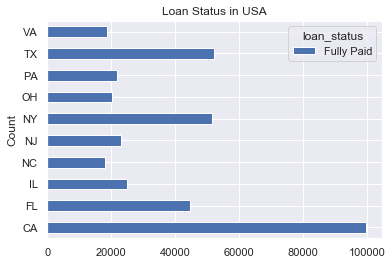

<Figure size 432x216 with 0 Axes>

In [182]:
df = df_loan[df_loan['loan_status'].isin(['Charged Off ', 'Fully Paid'])]
df = df[df['addr_state'].isin(['VA', 'TX', 'PA', 'OH', 'NY', 'NJ', 'NC', 'IL', 'FL', 'CA'])]
#df.head()

groupbyregionbucket = df.groupby(['addr_state', 'loan_status'])
regionbucketclicksum = groupbyregionbucket['loan_amnt'].aggregate(np.count_nonzero).unstack()
regionbucketclicksum.plot(kind = 'barh',  title = 'Loan Status in USA')

plt.ylabel('Count')
plt.figure(figsize=(6,3))

plt.show()

In [183]:
df_loan['loan_status'] = df_loan['loan_status'].astype('category').cat.codes
np.corrcoef(df_loan['loan_amnt'], df_loan['loan_status'] )

array([[ 1.       , -0.0641392],
       [-0.0641392,  1.       ]])

In [184]:
df1 = pd.DataFrame(df_loan, columns =['loan_amnt', 'annual_inc', 'grade', 'purpose', 'term', 'int_rate', 'Region', 'dti', 'emp_length', 'verification_status', 'loan_status']) 
df1.head()

,loan_amnt,annual_inc,grade,purpose,term,int_rate,Region,dti,emp_length,verification_status,loan_status
0,15000.0,78000.0,C,debt_consolidation,60 months,12.39,NaN,12.03,10+ years,Source Verified,1
1,10400.0,58000.0,A,credit_card,36 months,6.99,NaN,14.92,8 years,Not Verified,0
2,21425.0,63800.0,D,credit_card,60 months,15.59,NaN,18.49,6 years,Source Verified,1
4,7650.0,50000.0,C,debt_consolidation,36 months,13.66,NaN,34.81,< 1 year,Source Verified,0
5,9600.0,69000.0,C,debt_consolidation,36 months,13.66,NaN,25.81,10+ years,Source Verified,1


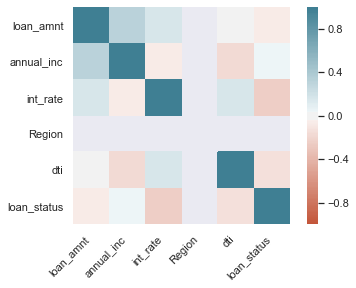

In [185]:
corr = df1.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);